## Training Ensemble Models

### Step 1 | Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix ,classification_report, mean_absolute_error, log_loss
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tune_clf_hyperparameters import tune_clf_hyperparameters
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings("ignore")

C:\Users\FPT Shop\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


### Step 2 | Import dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Training

### 3.1 | Voting 

In [4]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, C = 5, kernel='linear'))
])

In [5]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(
        metric= 'manhattan',
        n_neighbors= 17,
        weights= 'distance'
    ))
])

In [6]:
eclf = VotingClassifier(estimators=[
    ('svm', svm_pipeline),
    ('dt', DecisionTreeClassifier(
        criterion= 'entropy',
        max_depth= 11,
        max_features= None,
        min_samples_leaf= 10,
        min_samples_split= 2,
        splitter= 'best'
    )),
    ('rf', RandomForestClassifier(
        criterion= 'entropy',
        max_depth= None,
        max_features= 'sqrt',
        n_estimators= 900
    )),
    ('knn', knn_pipeline)],
    voting='soft'
)

In [7]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm',
                                               SVC(C=5, kernel='linear',
                                                   probability=True))])),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=11,
                                                     min_samples_leaf=10)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features='sqrt',
                                                     n_estimators=900)),
                             ('knn',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('knn',
         

In [8]:
print(classification_report(y_train, eclf.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     0.9799    0.9901    0.9850      2018
           1     0.9791    0.9862    0.9826      2465
           2     0.9875    0.9737    0.9806      1942
           3     0.9920    0.9841    0.9881      2018
           4     0.9866    0.9820    0.9843      2328
           5     0.9912    0.9962    0.9937      2598
           6     0.9981    0.9988    0.9985      3237

    accuracy                         0.9884     16606
   macro avg     0.9878    0.9873    0.9875     16606
weighted avg     0.9884    0.9884    0.9884     16606



In [9]:
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9171    0.9644    0.9402       505
           1     0.8713    0.8671    0.8692       617
           2     0.8263    0.7258    0.7728       485
           3     0.7955    0.8413    0.8177       504
           4     0.8849    0.8849    0.8849       582
           5     0.9589    0.9692    0.9640       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.9029      4152
   macro avg     0.8929    0.8927    0.8922      4152
weighted avg     0.9024    0.9029    0.9021      4152



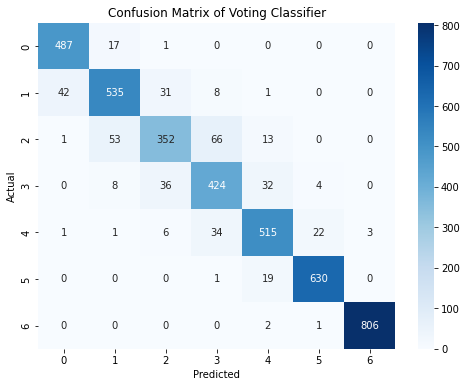

In [10]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix of Voting Classifier')

### 3.2 | Boosting

#### 3.2.1 | AdaBoost

In [11]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(
        criterion = 'entropy',
        max_depth = 11,
        min_samples_leaf = 10,
        min_samples_split = 2,
        splitter = 'best'
))


In [12]:
para_grid_ada = {
    'n_estimators': [25, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.2, 0.5, 1]
}

In [13]:
best_ada, best_ada_hyperparams, tuning_results = tune_clf_hyperparameters(ada_clf, para_grid_ada, X_train, y_train)

In [14]:
tuning_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,51.341941,4.085899,0.478503,0.020387,1,500,"{'learning_rate': 1, 'n_estimators': 500}",0.890427,0.890696,0.891900,0.897922,0.894008,0.892991,0.002771,1
13,29.317648,0.307624,0.329275,0.022476,0.5,200,"{'learning_rate': 0.5, 'n_estimators': 200}",0.889524,0.888588,0.888889,0.894008,0.898826,0.891967,0.003951,2
14,73.848546,1.543457,0.756171,0.098275,0.5,500,"{'learning_rate': 0.5, 'n_estimators': 500}",0.886815,0.890997,0.889190,0.895513,0.897019,0.891907,0.003828,3
18,29.338655,0.158966,0.311467,0.021511,1,200,"{'learning_rate': 1, 'n_estimators': 200}",0.888922,0.886480,0.892502,0.897320,0.893104,0.891666,0.003719,4
17,14.604510,0.251991,0.179241,0.005708,1,100,"{'learning_rate': 1, 'n_estimators': 100}",0.888922,0.887986,0.881361,0.896718,0.899127,0.890823,0.006401,5
12,14.407082,0.365710,0.164422,0.012719,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.891030,0.885878,0.884673,0.894610,0.888588,0.888956,0.003584,6
3,29.000483,1.856604,0.314071,0.023737,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.891331,0.886781,0.876844,0.891599,0.896718,0.888655,0.006691,7
9,74.479288,1.206859,0.890202,0.076943,0.2,500,"{'learning_rate': 0.2, 'n_estimators': 500}",0.886514,0.888287,0.884673,0.889792,0.892803,0.888414,0.002785,8
7,14.179574,0.246706,0.155035,0.007240,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",0.889825,0.884974,0.884673,0.890093,0.892201,0.888354,0.002999,9
2,13.309818,0.402605,0.175840,0.018534,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.888621,0.885577,0.884372,0.887986,0.894309,0.888173,0.003437,10


In [15]:
best_ada_hyperparams

{'learning_rate': 1, 'n_estimators': 500}

In [16]:
print(classification_report(y_train, best_ada.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     0.9985    0.9995    0.9990      2018
           1     0.9992    0.9988    0.9990      2465
           2     1.0000    0.9995    0.9997      1942
           3     1.0000    1.0000    1.0000      2018
           4     1.0000    1.0000    1.0000      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    1.0000    1.0000      3237

    accuracy                         0.9997     16606
   macro avg     0.9997    0.9997    0.9997     16606
weighted avg     0.9997    0.9997    0.9997     16606



In [17]:
y_pred_ada = best_ada.predict(X_test)
print(classification_report(y_test, y_pred_ada, digits=4))

              precision    recall  f1-score   support

           0     0.9415    0.9248    0.9331       505
           1     0.8740    0.8768    0.8754       617
           2     0.7911    0.7732    0.7821       485
           3     0.7931    0.8214    0.8070       504
           4     0.8793    0.8883    0.8838       582
           5     0.9705    0.9615    0.9660       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.9020      4152
   macro avg     0.8923    0.8918    0.8919      4152
weighted avg     0.9024    0.9020    0.9021      4152



Overfitting might appear here

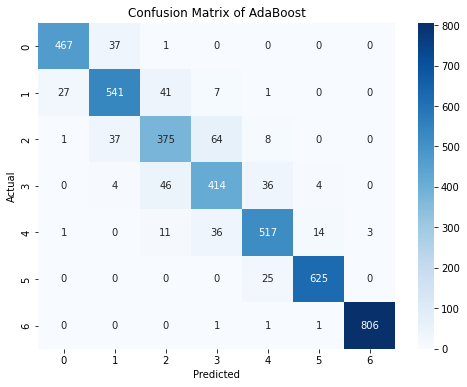

In [18]:
plot_confusion_matrix(y_test, y_pred_ada, 'Confusion Matrix of AdaBoost')

#### 3.2.2 | Gradient Boosting

In [19]:
grad_clf = GradientBoostingClassifier()
param_grid_grad = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate':[0.05, 0.1, 0.2, 0.5, 1],
    'max_depth': [3, 5, 10, None]
}

In [20]:
best_grad, best_grad_hyperparams, tuning_results = tune_clf_hyperparameters(grad_clf, param_grid_grad, X_train, y_train)

In [21]:
tuning_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,42.666032,2.060862,0.089221,0.012009,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.904877,0.901837,0.897019,0.905450,0.910569,0.903950,0.004459,1
3,95.499729,0.724616,0.181143,0.014144,0.05,3,500,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.903672,0.901536,0.896718,0.905751,0.909365,0.903408,0.004226,2
33,19.958259,0.719428,0.045811,0.002785,0.2,3,100,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.902167,0.903342,0.897922,0.905149,0.907558,0.903228,0.003216,3
6,60.316419,0.416450,0.124034,0.005878,0.05,5,200,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.900662,0.904547,0.896417,0.900933,0.910268,0.902565,0.004634,4
17,22.582871,2.538351,0.051513,0.005311,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.903672,0.903342,0.893707,0.904246,0.907859,0.902565,0.004715,5
19,101.229258,2.377457,0.191644,0.029911,0.1,3,500,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.901866,0.903945,0.899127,0.900933,0.906655,0.902505,0.002592,6
2,38.008427,0.838194,0.081418,0.001625,0.05,3,200,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.901866,0.902439,0.892502,0.905751,0.909064,0.902324,0.005547,7
21,31.501173,0.563987,0.067517,0.003976,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.900963,0.903342,0.895815,0.900331,0.909666,0.902023,0.004532,8
5,30.159064,0.543878,0.074617,0.007089,0.05,5,100,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.901565,0.902439,0.895815,0.903342,0.906956,0.902023,0.003606,9
32,9.543541,0.176277,0.024406,0.000490,0.2,3,50,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.901565,0.905149,0.890696,0.905751,0.905751,0.901783,0.005759,10


In [22]:
best_grad_hyperparams

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [23]:
print(classification_report(y_train, best_grad.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     0.9585    0.9604    0.9594      2018
           1     0.9097    0.9201    0.9149      2465
           2     0.8604    0.8347    0.8474      1942
           3     0.8706    0.8835    0.8770      2018
           4     0.9418    0.9377    0.9397      2328
           5     0.9866    0.9896    0.9881      2598
           6     1.0000    0.9994    0.9997      3237

    accuracy                         0.9394     16606
   macro avg     0.9325    0.9322    0.9323     16606
weighted avg     0.9392    0.9394    0.9393     16606



In [24]:
y_pred_grad = best_grad.predict(X_test)
print(classification_report(y_test, best_grad.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9320    0.9505    0.9412       505
           1     0.8778    0.8849    0.8814       617
           2     0.8190    0.7649    0.7910       485
           3     0.7950    0.8155    0.8051       504
           4     0.8790    0.8866    0.8828       582
           5     0.9707    0.9692    0.9700       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.9056      4152
   macro avg     0.8957    0.8954    0.8954      4152
weighted avg     0.9053    0.9056    0.9053      4152



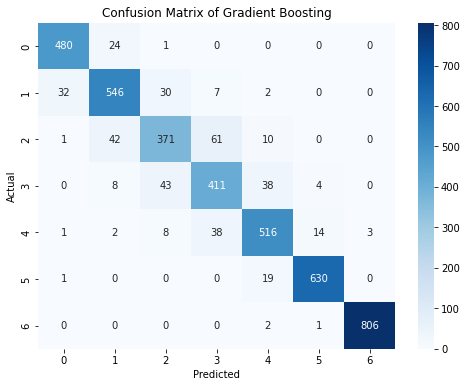

In [25]:
plot_confusion_matrix(y_test, y_pred_grad, 'Confusion Matrix of Gradient Boosting')